# Project: Business Public Sentiment

Design a model to predict the sentiment (positive or negative) of text and apply it to the twitter feed of a business.


## Structure

Take a look at the files in the directory to better understand the structure of the project. 

- `data/`: Folder containing the training and test data.
- `models/`: Folder containing models.
    - `baseline_model.py`: A baseline model to start with.
    - `model.py`: The final model.


## Understanding the data-set

The training data was in a single cvs file which was over 200M in size so I've split the file into smaller files for easy of use. You can also see the testdata which is very small relative to the amount of training data.

In [2]:
print("List all the files in the data directory\n")
!ls data

List all the files in the data directory

splitfile_1.csv
splitfile_10.csv
splitfile_11.csv
splitfile_12.csv
splitfile_13.csv
splitfile_14.csv
splitfile_15.csv
splitfile_16.csv
splitfile_2.csv
splitfile_3.csv
splitfile_4.csv
splitfile_5.csv
splitfile_6.csv
splitfile_7.csv
splitfile_8.csv
splitfile_9.csv
testdata.manual.2009.06.14.csv


In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Load the data
dataframe = pd.read_csv("data/training.1600000.processed.noemoticon.csv", sep=',', names=['labels','id', 'data', 'query', 'user', 'text'], encoding='ISO-8859-1', header=None)
dataframe.head()

,labels,id,data,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


    labels                                               text
0        0                               is sad about Farrah 
1        0  Going to chill out @ Arne's place. The @ is se...
2        0     @gillieschick Your boyfriend misses you, too. 
3        0  Back frpm sports and iÂ´m so ill - thatÂ´s not...
4        0         omg i just found out farrah fawcett died. 
5        0  @LisaHopeCyrus yes he was such a jerk and so m...
6        0  is sad that Farrah Fawcett just died  http://p...
7        0          @alex11790 yes yes I am  its exhaustinggg
8        0  One of my fav icons has passed away - RIP Farr...
9        0  Been in Photoshop 2 days straight and finally ...
10       0  So tired, not ready for work, throat hurts, co...
11       0  @ladykatiejane Sorry you lost your watch  We k...
12       0  @rlangeles no.  I slept Ina lil.. But it still...
13       0         cheer---2-a-days  today and tomorrow..... 
14       0  Today's Hair Style : Basic Bun - I do have to ...
15      

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D05BB0A90>,
      dtype=object)

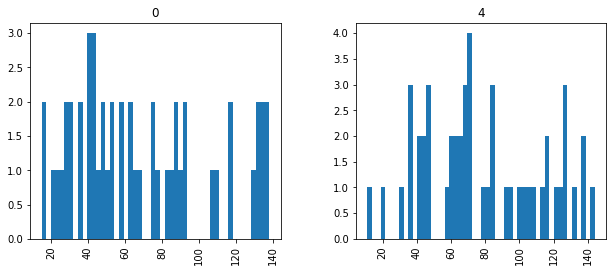

In [73]:
# Preprocess the data
dataframe_short = dataframe[799950:800050]
dataframe_short = dataframe_short.reset_index(drop=True)
#print(dataframe_short)

twitterData = dataframe_short.drop(columns=['id', 'data', 'query', 'user'])
twitterLabelledData = dataframe_short.drop(columns=['id', 'data', 'query', 'user'])
print(twitterLabelledData)

#twitterData.describe()
twitterData.groupby('labels').describe()
twitterData['length'] = twitterData['text'].apply(len)
#twitterData['length'].plot(bins = 50, kind = 'hist', figsize = (6, 4))
twitterData.hist(column = 'length', by = 'labels', bins = 50, figsize = (10, 4))

In [74]:
#twitterData.info()
twitterText = twitterData.drop(columns=['length', 'labels'])
#twitterText

dfToList = twitterText['text'].tolist()
#a = numpy.asarray(twitterText)
dfToA = twitterText.values.flatten()
#print(dfToA)
#print("The length of list is: ", len(dfToList))
#for x in range(len(dfToList)): 
#    print(dfToList[x])
#print("dfToList is", dfToList[0], "and it's a", type(dfToList))

#corpus = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']
count_vector = CountVectorizer()
count_vector.fit(dfToA)
names = count_vector.get_feature_names()
#names

doc_array = count_vector.transform(dfToA).toarray()
#doc_array

frequency_matrix = pd.DataFrame(data=doc_array, columns=names)
frequency_matrix

,06,06fuj,10,11,13ycf6,200,2009,24,28am,2pm,...,wtching,yay,yayyy,yeah,year,yes,you,your,youuuuu,zta
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
#twitterLabelText = twitterData.drop(columns=['length']).reset_index()
print(twitterLabelledData.head())

X_train, X_test, y_train, y_test = train_test_split(twitterLabelText['text'], twitterLabelText['labels'], random_state=1)
print('Number of rows in the total set: {}'.format(twitterLabelText.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

   labels                                               text
0       0                               is sad about Farrah 
1       0  Going to chill out @ Arne's place. The @ is se...
2       0     @gillieschick Your boyfriend misses you, too. 
3       0  Back frpm sports and iÂ´m so ill - thatÂ´s not...
4       0         omg i just found out farrah fawcett died. 
Number of rows in the total set: 10
Number of rows in the training set: 7
Number of rows in the test set: 3


In [76]:
count_vector = CountVectorizer()
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

predictions = naive_bayes.predict(testing_data)
print("GOOD")

GOOD


In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions, pos_label=4)))
print('Recall score: ', format(recall_score(y_test, predictions, pos_label=0)))
print('F1 score: ', format(f1_score(y_test, predictions, pos_label=0)))

Accuracy score:  0.3333333333333333
Precision score:  0.0
Recall score:  1.0
F1 score:  0.5


C:\Users\osullivanp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
